# Trained-Model Evaluation

In [1]:
import torch

from brumaire.board import BoardData
from brumaire.model import BrumaireHParams
from brumaire.controller import BrumaireController
from brumaire.agent import RandomAgent, BrumaireAgent
from brumaire.session import Game
from brumaire.rendering.decl import DeclEvalTableComponent
from brumaire.rendering.board import BoardComponent

## Hyperparameters

In [2]:
EVAL_BOARD_NUM = 10

DECL_L1_NODE = 1600
DECL_L2_NODE = 800
DECL_L3_NODE = 400

TRICK_L1_NODE = 1600
TRICK_L2_NODE = 800
TRICK_L3_NODE = 400

SAVED_DIR = "./runs/trial-2024-04-01T15-22-29.981839/"

In [3]:
h_params = BrumaireHParams()
h_params.decl_l1_node = DECL_L1_NODE
h_params.decl_l2_node = DECL_L2_NODE
h_params.decl_l3_node = DECL_L3_NODE
h_params.trick_l1_node = TRICK_L1_NODE
h_params.trick_l2_node = TRICK_L2_NODE
h_params.trick_l3_node = TRICK_L3_NODE

Use a CUDA device if available.

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Setup

Load a trained model from the file and make a new agent that follows the model.

In [5]:
controller = BrumaireController(h_params, device, None)
controller.load(SAVED_DIR)
agent = BrumaireAgent(controller)

Choose opponent agents.

In [6]:
opponent_agent = RandomAgent()
AGENTS = [agent, opponent_agent, opponent_agent, opponent_agent, opponent_agent]

## Evaluation

In [7]:
game = Game(EVAL_BOARD_NUM, AGENTS, log_enabled=True)
game.decide_napoleon()
game.discard_additional_cards()
for idx in range(10):
    game.trick(idx)
game.check_result()

An average of rewards the agent earns.

In [8]:
game.recorder.avg_reward(0)

0.86

A win rate of the agent.

In [9]:
win_rate = game.recorder.win_rate(0)
win_rate

0.8

An average of win rates of agents. This is not obvious because a number of winners of a game is not constant (1-4) on Napoleon.

In [10]:
total_win_rate = game.recorder.total_win_rate()
total_win_rate

0.6

A difference between a win rate of the agent and an average of others.

In [11]:
win_rate - total_win_rate

0.20000000000000007

A rate of the agent folding the game.

In [12]:
game.recorder.fold_rate(0)

1.0

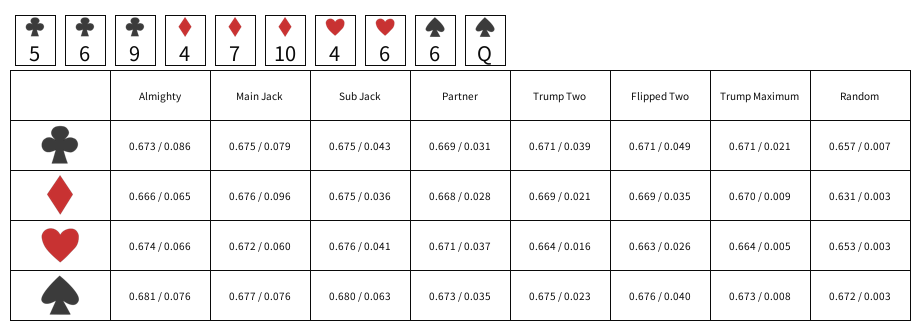

In [13]:
board = BoardData.from_vector(game.recorder.first_boards[0])
DeclEvalTableComponent(0, board, 0, controller).render()

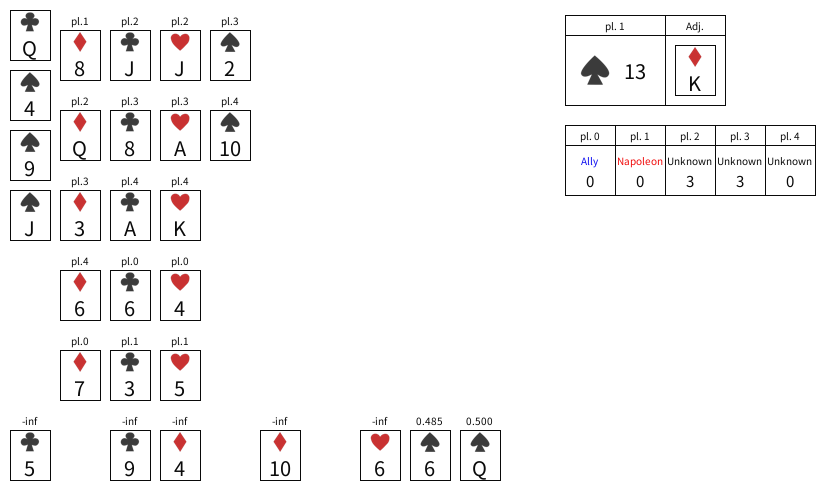

In [14]:
board = BoardData.from_vector(game.recorder.boards[0, :, 3])
BoardComponent(0, board, controller).render()